# Geometrical Transformations

In [2]:
# Import all the necessary toolbox for basic python development 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from spatialmath import *
from spatialmath.base import *
from scipy.spatial.transform import Rotation as R


## Introduction: few functions we're going to use  

In [3]:
# Create a point (vector) in the 3D space defining his coordinates x=1, y=1, z=1
point_1 = np.array([1, 1, 1])

In [33]:
# Create a matrix
T = np.array([[1, 0, 0, ],   
              [0, 1, 0, ],   
              [0, 0, 1, ]])  
print(T)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [42]:
# Create an Identity matrix
I = np.eye(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Substitute one specific value of the matrix with it's indexes
#count starts with 0!!!!
I[1,2] = 3
print(I)

[[1. 0. 0.]
 [0. 1. 3.]
 [0. 0. 1.]]


In [44]:
#Multipy a Matrix for a Vector
point_2 = np.dot(I,point_1)
print('Multiplied vector and matrix: ', point_2)

Multiplied vector and matrix:  [1. 4. 1.]


In [45]:
# Create a 5x5 zeros matrix
Z = np.zeros((5, 5))
# Print the matrix
print('Z: ')
print(Z)
print('Changed Z:')
# Change a whole row of the matrix
Z[3,] = 5
print(Z)
# Print the matrix and compare it with the original one


Z: 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Changed Z:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0.]]


## Introduction: How to create 3D plot

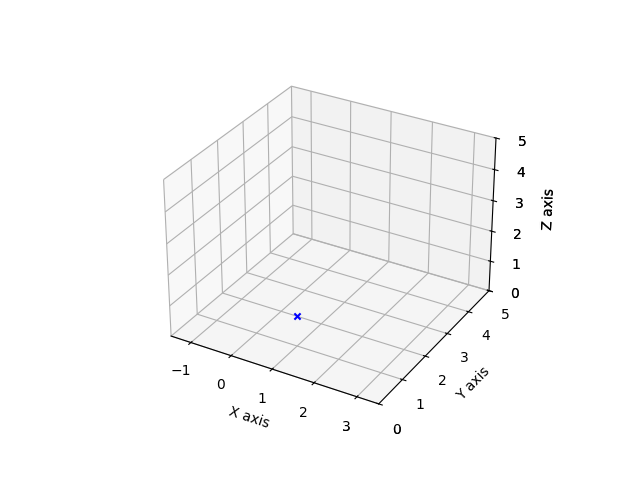

In [46]:
# Create the figure setup

#create a 3d point
point_1 = np.array([1, 1, 1])

# Interactable 3D Image
%matplotlib widget   

fig_1 = plt.figure('First 3D Plot')      # create the figure and set the name 
ax = fig_1.add_subplot(111, projection='3d')      # setup the 3D space

# Add the point to the figure
ax.scatter(point_1[0], point_1[1], point_1[2], c='b', marker='x')       # scatt the point coordinates, color, shape

# specify axis limit
ax.set_xlim([-1.5, 3.5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# specify axis names
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# Show the graph
plt.show(fig_1)

# Transform: Translation

### Translate a point summing coordinates

In [47]:
# create a vector to implement a translation of 2 on the z axis
Transl_vec = np.array([0, 0, 2])

# Sum the translation vector to the 3D point
p1_transformed = point_1 + Transl_vec

# Compare the coordinates of the original point and the translated point
print('Original point:', point_1)
print('Translated point:', p1_transformed)

Original point: [1 1 1]
Translated point: [1 1 3]


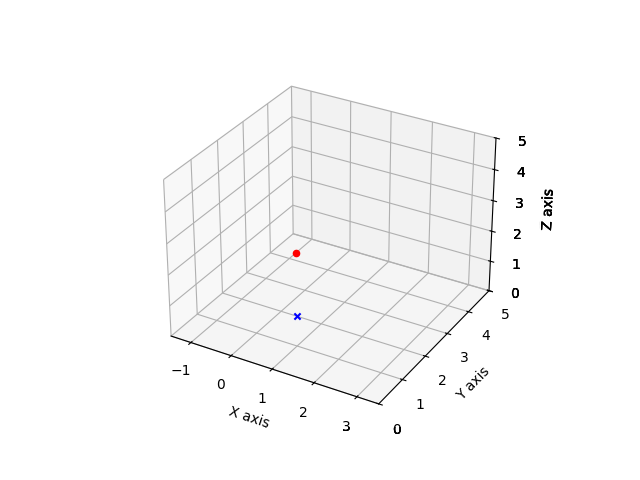

In [48]:
# Create a figure and show the original point and the translated point
fig_2 = plt.figure('Point Translation')      # create the figure
ax = fig_2.add_subplot(111, projection='3d')      # setup the 3D space

# Add the point to the figure
ax.scatter(point_1[0], point_1[1], point_1[2], c='b', marker='x')          # scatt the point coordinates, color, shape
ax.scatter(p1_transformed[0], p1_transformed[1], p1_transformed[2], c='r', marker='o')       # scatt the point coordinates, color, shape

# specify axis limit
ax.set_xlim([-1.5, 3.5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# specify axis names
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig_2)

### Translate a point using translation matrices

In [12]:
# Let's compute a translation using a transformation matrix 

# Create a 3D point with the same coordinate of point_1, what else do we need to add to apply the Transformation matrix?
p1 = np.array([1, 1, 1, 1])

# Let's plain define the transformation matrix with translation vector with the following coordinates x=0, y=0, z=3
T1 = np.array([[1,0,0,0], # Row 1
              [0,1,0,0],  # Row 2
              [0,0,1,3],  # Row 3
              [0,0,0,1]]) # Row 4

# Let's multiplicate. Do we pre or post multiplicate?  Be careful, is your point a row vector or a column vector?
p1_transformed = np.dot(T1, p1) #its a column vector, you need to pre multiplicate

# Compare the coordinates of the original point and the translated point, remember the homogeneous component 1 is not part of the coordinates
print("Original point:", p1)#[:,0:3])

print("and point_1 looks like this:", point_1)
print("Transformed point:", p1_transformed[0:3].T) #.T means transposed


Original point: [1 1 1 1]
and point_1 looks like this: [1 1 1]
Transformed point: [1 1 4]


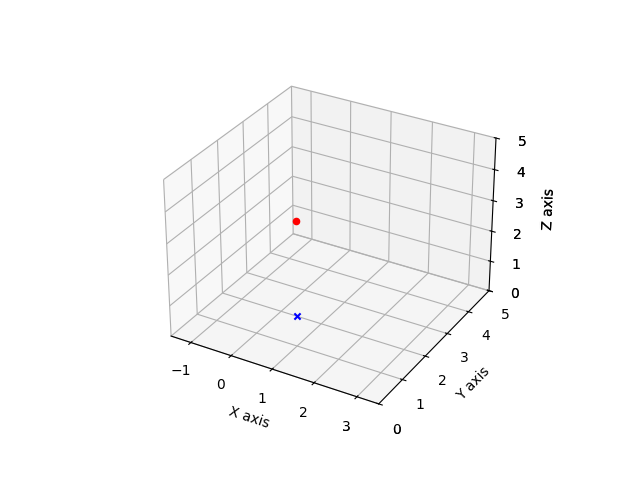

In [13]:
# Create a figure and show the original point and the translated point
fig_2 = plt.figure('Point Translation')      # create the figure
ax = fig_2.add_subplot(111, projection='3d')      # setup the 3D space

# Add the point to the figure
ax.scatter(p1[0],p1[1],p1[2], c='b', marker='x')          # scatt the point coordinates, color, shape
ax.scatter(p1_transformed[0], p1_transformed[1], p1_transformed[2], c='r', marker='o')       # scatt the point coordinates, color, shape

# specify axis limit
ax.set_xlim([-1.5, 3.5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# specify axis names
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig_2)

### Translate a point using transfromation matrices using a toolbox

In [14]:
# Creation of a transformation matrix for a translation of 3 units along the z-axis
T = SE3.Tz(3)
print("Translation matrix:\n")
print(T)
print("We see in: \n * blue the position vector,\n * red the orientation matrix,\n * gray the Homogeneous components")

# Define the point x=1, y=1, z=1, what else do we need to add to apply the Transformation matrix?
point = np.array([1, 1, 1, 1])
# Let's multiplicate. Do we pre or post multiplicate?  Be careful, is your point a row vector or a column vector?
transformed_point = np.dot(T, point)

# Compare the coordinates of the original point and the translated point,remember the homogeneous component 1 is not part of the coordinates
print("Original Point:", point)
print("Transformed Point:", transformed_point[0:3].T)


Translation matrix:

   1         0         0         0         
   0         1         0         0         
   0         0         1         3         
   0         0         0         1         

We see in: 
 * blue the position vector,
 * red the orientation matrix,
 * gray the Homogeneous components
Original Point: [1 1 1 1]
Transformed Point: [1. 1. 4.]


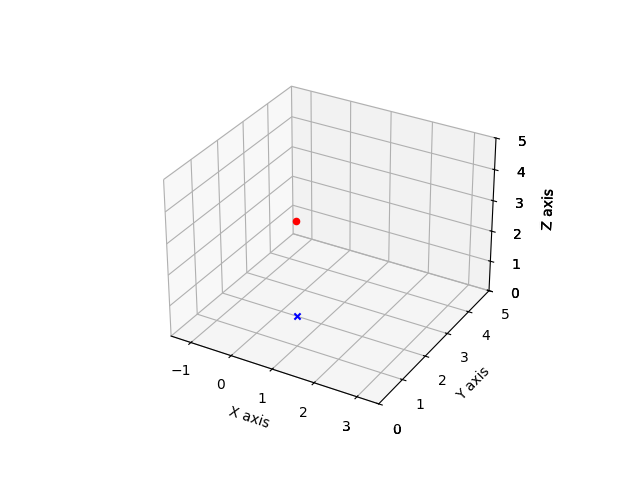

In [15]:
# Create a figure and show the original point and the translated point
fig_2 = plt.figure('Point Translation')      # create the figure
ax = fig_2.add_subplot(111, projection='3d')      # setup the 3D space

# Add the point to the figure
ax.scatter(point[0], point[1], point[2], c='b', marker='x')          # scatt the point coordinates, color, shape
ax.scatter(transformed_point[0], transformed_point[1], transformed_point[2], c='r', marker='o')       # scatt the point coordinates, color, shape

# specify axis limit
ax.set_xlim([-1.5, 3.5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# specify axis names
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig_2)

# Transform: Rotation

### Rotate a point using roational matrix

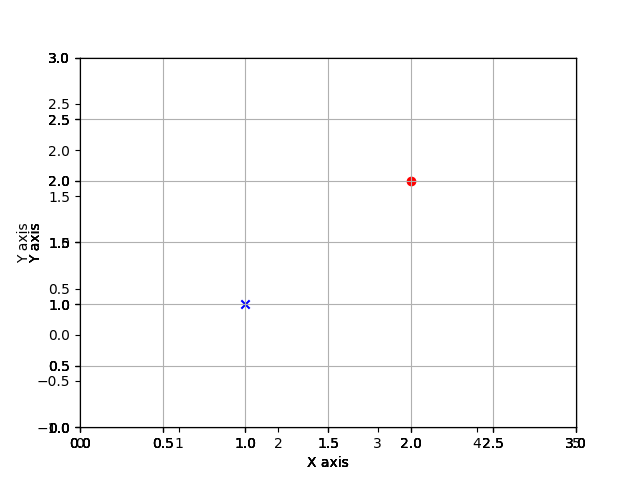

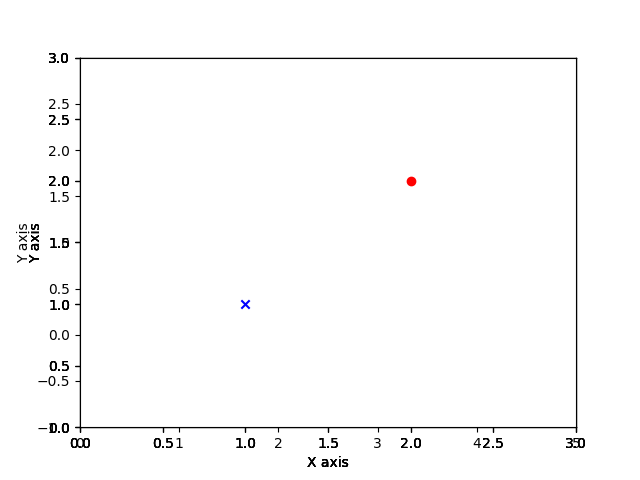

In [51]:
# In the following exercise we will be rotating a point p2 around p1 by 90 degrees on the p1 x-axis 
# Define two 2D points. P1 x=1 and y=1. P2 x=2 and y=2.
p1 = np.array([1,1])
p2 = np.array([2,2])

fig_3 = plt.figure("Point Rotation")      # create the figure
ax = fig_3.add_subplot(111)      # setup the 3D space

# Add the point to the figure
ax.scatter(p1[0],p1[1], c='b', marker='x')       # scatt the point coordinates, color, shape
ax.scatter(p2[0],p2[1], c='r', marker='o')

# Axes limits range
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')


plt.grid()
# Show the graph
plt.show(fig_3)


plt.grid()
# Show the graph
plt.show(fig_3)



In [17]:
# define an angle = 90 degrees using the np library
t = (np.pi)/2

# define a plane rotation matrix on x (check on the slides)
Rx = np.array([[np.cos(t), -np.cos(t)], 
              [np.sin(t), np.cos(t)]])  

# express coordinates p2 wrt p1
p2_1 = p2 - p1 #needs to be defined as np.array
# rotate p2 around the origin (which is now p1)
p2_1_r = np.dot(Rx, p2_1.T)
# remember we want to know the coordinates wrt the REAL origin
# thus, we need to translate back p2 in its original reference frame
p2_r = p2_1_r.T + p1.T

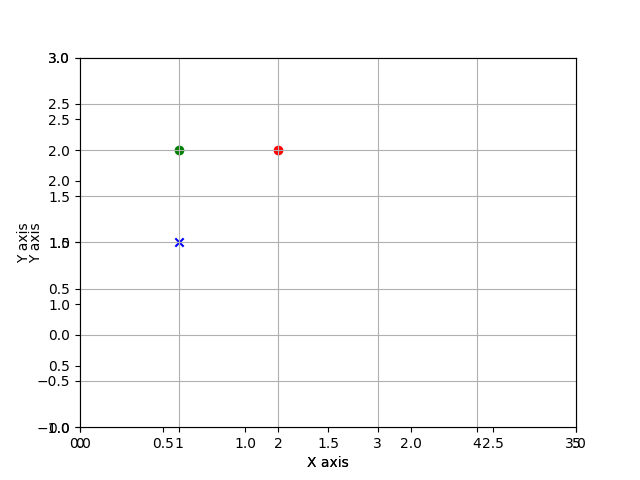

In [18]:

fig_3 = plt.figure("Point Rotation")     # create the figure
ax = fig_3.add_subplot(111)      # setup the 3D space

# Add the point to the figure
ax.scatter(p1[0],p1[1], c='b', marker='x')       # scatt the point coordinates, color, shape
ax.scatter(p2[0],p2[0], c='r', marker='o')
ax.scatter(p2_r[0], p2_r[1], c='g', marker='o')

# Axes limits range
ax.set_xlim([0, 5])
ax.set_ylim([-1, 3])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.grid()
# Show the graph
plt.show(fig_3)

### Toolboxes rotation matrix

### Relative Rotation: plain vs toolboxe implementation 

In [19]:
# Initializes a 90 degree rotation around the y-axis
alpha_y = (np.pi)/2 

# define the plain rotation matrix around y
rotm_y_Plain_matrix =  np.array([[np.cos(alpha_y), 0, np.sin(alpha_y)], 
                                 [0, 1, 0], 
                                 [-np.sin(alpha_y), 0, np.cos(alpha_y)]])

# Use the spatialmath toolbox functions 
rotm_y_toolbox = roty(alpha_y)

print("Plain Matrix: \n", rotm_y_Plain_matrix) 
print("Spatial Math Toolbox Matrix: \n", rotm_y_toolbox)


Plain Matrix: 
 [[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]
Spatial Math Toolbox Matrix: 
 [[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]


### Transformation matrix: plain vs toolbox implementation

In [20]:
# Define the homogeneous matrix representing a pi/3 rotation around the x-axis and a translation of a vector [1,2,3]
T_position = np.array([1,2,3])
alpha_x = (np.pi)/3

# Plain implementation
# define the plain rotation matrix
R_plainML = np.array([[1, 0, 0], 
                    [0, np.cos(alpha_x), -np.sin(alpha_x)], 
                    [0, np.sin(alpha_x), np.cos(alpha_x)]])


# define a 4x4 identity matrix
T_plainML = np.eye(4)
# Substitute the rotation matrix in the transformation matrix
T_plainML[:3, :3] = R_plainML
# Substitute the translation vector in the transformation matrix
T_plainML[:3, 3] = T_position


# Use the spatialmath toolbox functions 
T_toolbox = np.dot(transl(T_position), trotx(alpha_x))
#trotx ==> rototranslational matrix

print("T plain: \n", T_plainML)
print("T toolbox with np.dot() product operator:\n", T_toolbox)

T plain: 
 [[ 1.         0.         0.         1.       ]
 [ 0.         0.5       -0.8660254  2.       ]
 [ 0.         0.8660254  0.5        3.       ]
 [ 0.         0.         0.         1.       ]]
T toolbox with np.dot() product operator:
 [[ 1.         0.         0.         1.       ]
 [ 0.         0.5       -0.8660254  2.       ]
 [ 0.         0.8660254  0.5        3.       ]
 [ 0.         0.         0.         1.       ]]


# Rigid Body Frame

### Using the rigid body frame T1 build a second frame T2 such that: 
### R2 is equal to R1 rotated for 90 degrees around y axis 
### FIXED AXES

In [21]:
# Let's pick our T matrix
T1 = np.array([[-0.9388, 0.1746, -0.2968, 0.5],
               [0.2996, 0.8391, -0.4540, 0.5],
               [0.1698, -0.5152, -0.8401, 0.5],
               [0, 0, 0, 1.0]])

print("Matrice T1:")
print(T1)

Matrice T1:
[[-0.9388  0.1746 -0.2968  0.5   ]
 [ 0.2996  0.8391 -0.454   0.5   ]
 [ 0.1698 -0.5152 -0.8401  0.5   ]
 [ 0.      0.      0.      1.    ]]


In [22]:
# Extract R1 from T1
R1 = T1[:3,:3] 

# Compute R2 PRE-MULTIPLYING
R2 = np.dot(rotm_y_Plain_matrix, R1)
#Post means rotatiojn matrix comes second and pre multp. means its comes first

# Create T2
# 4x4 Identity matrix
T2_pre = np.eye(4)
# Substitute R2
T2_pre[0:3,0:3] = R2
# Substitute position components
T2_pre[:3,3] = [0.5, 0.5, 0.5]

print(T2_pre)


[[ 0.1698 -0.5152 -0.8401  0.5   ]
 [ 0.2996  0.8391 -0.454   0.5   ]
 [ 0.9388 -0.1746  0.2968  0.5   ]
 [ 0.      0.      0.      1.    ]]


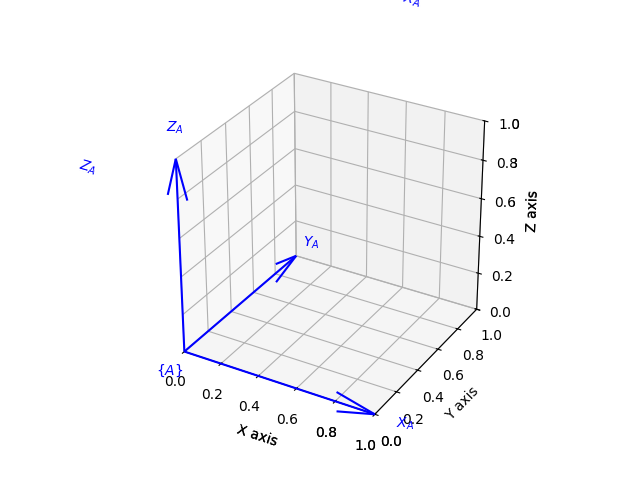

In [52]:
%matplotlib widget
# Create the figure setup
# %matplotlib widget
fig_4 = plt.figure('Pre multiplication Transformation')      # create the figure
ax = fig_4.add_subplot(111, projection='3d')      # setup the 3D space

tranimate(T2_pre, repeat=False, frame='A', arrow=True, dims=[0, 5])

# Axes limits range
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig_4)




### Using the rigid body frame T1 build a second frame T3 such that: 
### R3 is equal to R1 rotated for 90 degrees around y axis 
### MOBILE AXES

In [24]:
# Extract R1 from T1
R1 = T1[:3,:3] 
# Compute R3 POST-MULTIPLYING
R3 = np.dot(R1, rotm_y_Plain_matrix)
#Post means rotatiojn matrix comes second and pre multp. means its comes first

# Create T3
# 4x4 Identity matrix
T3_post = np.eye(4)
# Substitute R3
T3_post[0:3,0:3] = R3
# Substitute position components
T3_post[:3,3] = [0.5, 0.5, 0.5]

print(T3_post)

[[ 0.2968  0.1746 -0.9388  0.5   ]
 [ 0.454   0.8391  0.2996  0.5   ]
 [ 0.8401 -0.5152  0.1698  0.5   ]
 [ 0.      0.      0.      1.    ]]


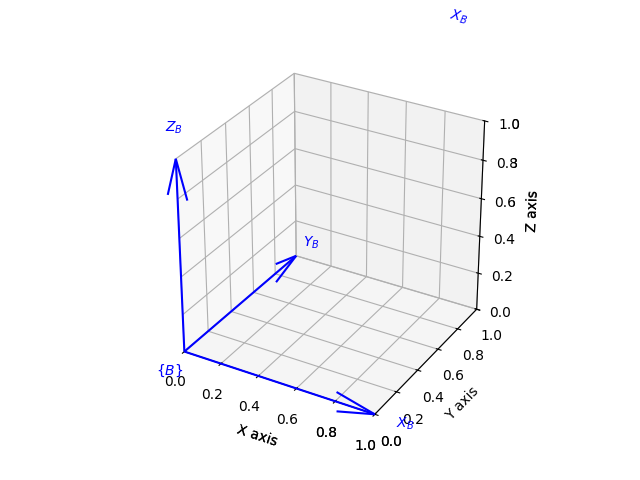

In [53]:
%matplotlib widget
# Create the figure setup
# %matplotlib widget
fig_5 = plt.figure('Post multiplication Transformation')      # create the figure
ax = fig_5.add_subplot(111, projection='3d')      # setup the 3D space

tranimate(T3_post, repeat=False, frame='B', arrow=True, dims=[0, 5])

# Axes limits range
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig_5)




### Rotation matrix or ..?

In [26]:
# Convert quaternion into rotation matrix plain vs toolbox

# quaternion to transform
q = np.array([0.9239, 0.3827, 0, 0])

# extract every quaternion component
q0 = q[0]
q1 = q[1]
q2 = q[2]
q3 = q[3]

# plain computation
R_plainML = np.array([[q0**2 + q1**2 - q2**2 - q3**2, 2 * (q1 * q2 - q0 * q3), 2 * (q1 * q3 + q0 * q2)],
                      [2 * (q1 * q2 + q0 * q3), q0**2 - q1**2 + q2**2 - q3**2, 2 * (q2 * q3 - q0 * q1)],
                      [2 * (q1 * q3 - q0 * q2), 2 * (q2 * q3 + q0 * q1), q0**2 - q1**2 - q2**2 + q3**2]])

# Find the right command on the spatialmath.base toolbox to convert quaternions into rotation matrix https://bdaiinstitute.github.io/spatialmath-python/
R_toolbox = q2r(q)

print("R_plainML:")
print(R_plainML)
print("\nR_toolbox:")
print(R_toolbox)


R_plainML:
[[ 1.0000505   0.          0.        ]
 [ 0.          0.70713192 -0.70715306]
 [ 0.          0.70715306  0.70713192]]

R_toolbox:
[[ 1.          0.          0.        ]
 [ 0.          0.70708142 -0.70715306]
 [ 0.          0.70715306  0.70708142]]


# Recap Excercise

In [27]:
# The poses of the center of mass of the shown objects in the global coordinate frame are given:

RF_alpha = np.array([
    [0.900968867902419, -0.433883739117558, 0, -0.217812859010447],
    [0.216941869558779, 0.450484433951210, -0.866025403784439, 0.00651149283299469],
    [0.375754340364785, 0.780261927622401, 0.500000000000000, 0.110505404222445],
    [0, 0, 0, 1]
])


RF_beta = np.array([
    [-0.900968867902419, -0.433883739117558, 1.22464679914735e-16, 0.220122043576173],
    [-0.433883739117558, 0.900968867902419, 0, 0.308842379100790],
    [-1.10336864020811e-16, -5.31354332312403e-17, -1, 0.0171862266350851],
    [0, 0, 0, 1]
])


RF_gamma = np.array([
    [0.612372435695795, 0.280330085889911, 0.739198919740117, -0.298318062127522],
    [0.353553390593274, 0.739198919740117, -0.573223304703363, -0.148460367451971],
    [-0.707106781186548, 0.612372435695795, 0.353553390593274, -0.212316346663997],
    [0, 0, 0, 1]
])

# create SE3 objects
T_alpha = SE3(RF_alpha)
T_beta = SE3(RF_beta)
T_gamma = SE3(RF_gamma)


In [28]:
# (1) Find the transformation that can transform measurements from gamma’s local coordinate to that of alpha.

tf_gamma_to_alpha = T_alpha.inv() * T_gamma

print("transform from gamma to alpha: \n", tf_gamma_to_alpha)

transform from gamma to alpha: 
    0.3627    0.643     0.6745   -0.2275    
  -0.6582    0.6892   -0.3031   -0.2868    
  -0.6597   -0.334     0.6732   -0.0272    
   0         0         0         1         



In [29]:
# (2) Find the rotation matrix that takes the coordinate frame of alpha to that of beta.

tf_alpha_to_beta = T_beta.inv() * T_alpha
r_alpha_to_beta = tf_alpha_to_beta.A[:3, :3]

tf_alpha_to_beta = T_beta.inv() * T_gamma
r_gamma_to_beta = tf_alpha_to_beta.A[:3, :3]

print("rotation from alpha to beta: \n ", r_alpha_to_beta, '\n')
print("rotation from gamma to beta: \n ", r_gamma_to_beta)

rotation from alpha to beta: 
  [[-0.90587245  0.19545787  0.37575434]
 [-0.19545787  0.59412755 -0.78026193]
 [-0.37575434 -0.78026193 -0.5       ]] 

rotation from gamma to beta: 
  [[-0.70512957 -0.57329507 -0.41728294]
 [ 0.05284216  0.54436455 -0.83718274]
 [ 0.70710678 -0.61237244 -0.35355339]]


In [30]:
# (3) Convert r_alpha_to_beta in euler angles, quaternion and axis angle. 
# Find the right command on the spatialmath.base toolbox https://bdaiinstitute.github.io/spatialmath-python/

r_alpha_to_beta_euler = tr2eul(r_alpha_to_beta)

r_alpha_to_beta_quat = r2q(r_alpha_to_beta) #input must be element of SO3 3x3 matrix

r_alpha_to_beta_axang = tr2angvec(r_alpha_to_beta)

print("Euler angles: \n: ", r_alpha_to_beta_euler) 
print("Quaternion: \n: ", r_alpha_to_beta_quat)
print("Axis angle: \n: ", r_alpha_to_beta_axang)

Euler angles: 
:  [-1.12199738  2.0943951  -1.12199738]
Quaternion: 
:  [ 2.16941870e-01 -1.58383198e-16  8.66025404e-01 -4.50484434e-01]
Axis angle: 
:  (2.7042313815792234, array([ 3.93184326e-16,  8.87153384e-01, -4.61474673e-01]))


In [31]:
# (4) Find out which angle is larger between the angle of rotation from alpha to beta and the angle of rotation from gamma to beta
# Find the right command on the spatialmath.base toolbox https://bdaiinstitute.github.io/spatialmath-python/

r_a_to_b = SO3(r_alpha_to_beta) #3x3 element SO3
r_g_to_b = SO3(r_gamma_to_beta) #3x3 element SO3

angle_a_to_b = SO3.angvec(r_a_to_b)
angle_a_to_b = np.degrees(angle_a_to_b[0])

angle_g_to_b = SO3.angvec(r_g_to_b)
angle_g_to_b = np.degrees(angle_g_to_b[0])


#with numpy
#angle_a_to_b = np.degrees(np.arccos((np.trace(r_a_to_b)-1)/2))
#angle_g_to_b = np.degrees(np.arccos((np.trace(r_g_to_b)-1)/2))

print("angle of rotation from alpha to beta in degrees: \n", angle_a_to_b)
print("angle of rotation from gamma to beta in degrees: \n", angle_g_to_b)

angle of rotation from alpha to beta in degrees: 
 154.94104499132118
angle of rotation from gamma to beta in degrees: 
 139.21439567065084


### Which angle is larger?

In [32]:
# Beta has lost its vision. 
# Alpha wants to calculate the direction in which Beta has to move to reach Gamma. 
# Find the vector that connects beta to gamma in alpha reference frame.

pos_beta = RF_beta[:3, 3]
pos_gamma = RF_gamma[:3, 3]

result_pos = pos_gamma - pos_beta

R_aplha = RF_alpha[:3,:3]


vec_in_alpha_coord = R_aplha @ result_pos  
print("vector that connects beta to gamma in alpha reference frame: \n" , vec_in_alpha_coord)

vector that connects beta to gamma in alpha reference frame: 
 [-0.26868217 -0.11972408 -0.66637333]
